Dataset

In [1]:
# letterdata.csv

Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load the Data

In [4]:
df = pd.read_csv('letterdata.csv')
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [5]:
df.shape

(20000, 17)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
xbox,20000.0,4.02355,1.913212,0.0,3.0,4.0,5.0,15.0
ybox,20000.0,7.03550,3.304555,0.0,5.0,7.0,9.0,15.0
width,20000.0,5.12185,2.014573,0.0,4.0,5.0,6.0,15.0
height,20000.0,5.37245,2.261390,0.0,4.0,6.0,7.0,15.0
onpix,20000.0,3.50585,2.190458,0.0,2.0,3.0,5.0,15.0
xbar,20000.0,6.89760,2.026035,0.0,6.0,7.0,8.0,15.0
ybar,20000.0,7.50045,2.325354,0.0,6.0,7.0,9.0,15.0
x2bar,20000.0,4.62860,2.699968,0.0,3.0,4.0,6.0,15.0
y2bar,20000.0,5.17865,2.380823,0.0,4.0,5.0,7.0,15.0
xybar,20000.0,8.28205,2.488475,0.0,7.0,8.0,10.0,15.0


Seperate input and output values

In [6]:
x = df.drop('letter', axis=1)
y = df['letter']

<Axes: xlabel='count', ylabel='letter'>

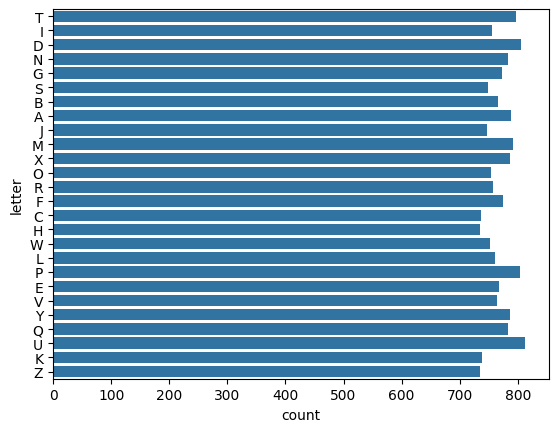

In [7]:
sns.countplot(y=y)

Cross Validation

In [11]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)

In [14]:
X_train.shape

(16000, 16)

In [15]:
X_test.shape

(4000, 16)

Build the Model

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dt = DecisionTreeClassifier(random_state=0)

In [18]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [19]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [20]:
y_pred = dt.predict(X_test)

In [21]:
y_pred

array(['Y', 'B', 'K', ..., 'A', 'O', 'I'], dtype=object)

In [22]:
accuracy_score(y_test, y_pred)

0.88125

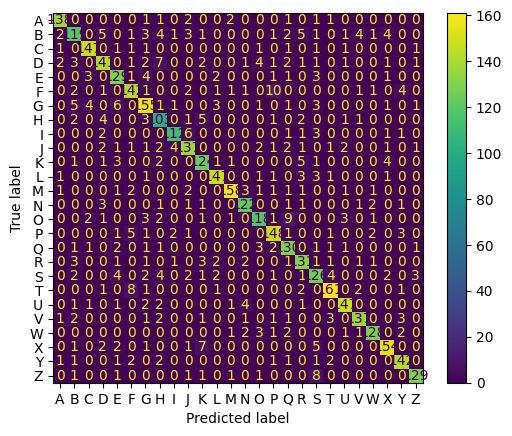

In [23]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.94      0.94      0.94       147
           B       0.83      0.75      0.79       158
           C       0.93      0.94      0.94       156
           D       0.87      0.82      0.84       171
           E       0.84      0.89      0.86       145
           F       0.87      0.85      0.86       167
           G       0.84      0.85      0.84       182
           H       0.77      0.84      0.80       123
           I       0.93      0.88      0.90       127
           J       0.86      0.86      0.86       159
           K       0.84      0.87      0.86       143
           L       0.92      0.92      0.92       159
           M       0.95      0.91      0.93       173
           N       0.90      0.91      0.90       134
           O       0.87      0.83      0.85       142
           P       0.86      0.90      0.88       165
           Q       0.82      0.90      0.86       145
           R       0.85    

SVM

rbf

In [25]:
from sklearn.svm import SVC

In [26]:
svm = SVC(kernel='rbf', random_state=0)

In [27]:
svm.fit(X_train, y_train)

SVC(random_state=0)

Evaluate the performance

In [28]:
y_pred = svm.predict(X_test)

In [29]:
accuracy_score(y_test, y_pred)

0.9335

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.97      0.97      0.97       147
           B       0.87      0.92      0.89       158
           C       0.97      0.94      0.95       156
           D       0.87      0.95      0.91       171
           E       0.90      0.90      0.90       145
           F       0.92      0.94      0.93       167
           G       0.88      0.93      0.91       182
           H       0.89      0.85      0.87       123
           I       0.97      0.92      0.95       127
           J       0.95      0.91      0.93       159
           K       0.95      0.90      0.92       143
           L       0.99      0.94      0.96       159
           M       0.95      0.94      0.94       173
           N       0.94      0.99      0.96       134
           O       0.92      0.92      0.92       142
           P       0.99      0.86      0.92       165
           Q       0.93      0.97      0.95       145
           R       0.81    

linear

In [39]:
svm = SVC(kernel='linear', random_state=0)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8655
              precision    recall  f1-score   support

           A       0.89      0.95      0.92       147
           B       0.83      0.83      0.83       158
           C       0.89      0.90      0.90       156
           D       0.85      0.90      0.88       171
           E       0.78      0.83      0.81       145
           F       0.89      0.86      0.87       167
           G       0.77      0.80      0.79       182
           H       0.65      0.73      0.69       123
           I       0.92      0.90      0.91       127
           J       0.91      0.87      0.89       159
           K       0.80      0.85      0.82       143
           L       0.92      0.90      0.91       159
           M       0.95      0.91      0.93       173
           N       0.91      0.95      0.93       134
           O       0.90      0.82      0.86       142
           P       0.95      0.87      0.91       165
           Q       0.88      0.82      0.85       145
           R       0

poly

In [45]:
svm = SVC(kernel='poly', random_state=0)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.95425
              precision    recall  f1-score   support

           A       0.99      0.99      0.99       147
           B       0.91      0.92      0.92       158
           C       0.97      0.97      0.97       156
           D       0.91      0.94      0.93       171
           E       0.95      0.95      0.95       145
           F       0.94      0.95      0.95       167
           G       0.92      0.96      0.94       182
           H       0.90      0.89      0.90       123
           I       0.97      0.94      0.96       127
           J       0.98      0.95      0.96       159
           K       0.96      0.94      0.95       143
           L       0.99      0.95      0.97       159
           M       0.99      0.96      0.97       173
           N       0.96      0.99      0.97       134
           O       0.93      0.93      0.93       142
           P       0.97      0.93      0.95       165
           Q       0.99      0.95      0.97       145
           R       

Sigmoid

In [42]:
svm = SVC(kernel='sigmoid', random_state=0)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.029
              precision    recall  f1-score   support

           A       0.02      0.43      0.05       147
           B       0.00      0.00      0.00       158
           C       0.00      0.00      0.00       156
           D       0.00      0.00      0.00       171
           E       0.00      0.00      0.00       145
           F       0.00      0.00      0.00       167
           G       0.00      0.00      0.00       182
           H       0.00      0.00      0.00       123
           I       0.00      0.00      0.00       127
           J       0.00      0.00      0.00       159
           K       0.00      0.00      0.00       143
           L       0.00      0.00      0.00       159
           M       0.00      0.00      0.00       173
           N       0.00      0.00      0.00       134
           O       0.00      0.00      0.00       142
           P       0.00      0.00      0.00       165
           Q       0.00      0.00      0.00       145
           R       0.

c:\Users\Administrator.DAI-PC2\.conda\envs\New\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Administrator.DAI-PC2\.conda\envs\New\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Administrator.DAI-PC2\.conda\envs\New\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

Random Forest Classifer

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rf = RandomForestClassifier(n_estimators=20) 

In [35]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [36]:
y_pred = rf.predict(X_test)

In [37]:
accuracy_score(y_test, y_pred)

0.956

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.98      1.00      0.99       147
           B       0.91      0.92      0.92       158
           C       0.94      0.98      0.96       156
           D       0.91      0.96      0.94       171
           E       0.92      0.94      0.93       145
           F       0.93      0.95      0.94       167
           G       0.98      0.93      0.95       182
           H       0.92      0.89      0.91       123
           I       0.96      0.94      0.95       127
           J       0.96      0.96      0.96       159
           K       0.93      0.90      0.91       143
           L       0.98      0.96      0.97       159
           M       0.98      0.96      0.97       173
           N       0.94      0.96      0.95       134
           O       0.99      0.96      0.97       142
           P       0.99      0.94      0.97       165
           Q       0.92      0.99      0.95       145
           R       0.90    

In [43]:
new = pd.DataFrame(
    [[6,9,9,7,6,5,6,3,5,10,9,9,8,5,2,7],
     [5,10,7,8,5,6,10,2,6,13,7,5,1,10,2,7]], columns=x.columns)

In [44]:
new

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,6,9,9,7,6,5,6,3,5,10,9,9,8,5,2,7
1,5,10,7,8,5,6,10,2,6,13,7,5,1,10,2,7


In [46]:
svm.predict(new)

array(['M', 'F'], dtype=object)